### This notebook is dedicated to plot the dynamic spectrum of radio emissions observed by the Parker Solar Probe (PSP), the FIELDS Radio Frequency Spectrometer (RFS) instrument 
##### Compiled by: Mohamed Nedal, Institute of Astronomy with National Astronomical Observatory, Bulgarian Academy of Sciences, Sofia, Bulgaria 
##### Many thanks to: Bing Ma$^{1,2}$, Marc Pulupa$^3$, Dejin Wu$^1$, Kamen Kozarev$^5$, Peijin Zhang$^5$, and Jon Vandegriff$^4$ 
$^1$ Key Laboratory of Planetary Sciences, Purple Mountain Observatory, Chinese Academy of Sciences, Nanjing 210023, People’s Republic of China 

$^2$ School of Astronomy and Space Science, University of Science and Technology of China, Hefei 230026, People’s Republic of China 

$^3$ Space Sciences Laboratory, University of California, Berkeley, CA 94720-7450, USA 

$^4$ JHU Applied Physics Laboratory, 11100 Johns Hopkins Road Laurel, Maryland 20723, USA 

$^5$ Institute of Astronomy with National Astronomical Observatory, Bulgarian Academy of Sciences, Sofia, Bulgaria 

* Description of parameters can be found in [this website.](https://hpde.io/NASA/NumericalData/ParkerSolarProbe/FIELDS/RFS/Level2/HFR/PT7S.html) 
* CDF data files can be found in [this website.](http://research.ssl.berkeley.edu/data/psp/data/sci/fields/) 

In [2]:
import os
os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'
from spacepy import pycdf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# myFmt = DateFormatter('%Y/%m/%d %H:%M')
myFmt = DateFormatter('%H:%M')

In [3]:
print('Available CDF files are:\n')
print(*os.listdir(), sep='\n')
cdf_file = input('\nWhich file to use?\n\n')
print('The data file {} will be used\n\n'.format(cdf_file))

Avaiabel CDF files are:

psp_fld_l2_rfs_lfr_20190401_v02.cdf
psp_fld_l2_rfs_hfr_20190901_v02.cdf
spectrum.png
cdf-Copy1.ipynb
psp_fld_l2_rfs_burst_20191226_v02.cdf
psp_fld_l2_rfs_hfr_20190220_v02.cdf
cdf.ipynb
Untitled.ipynb
psp_fld_l2_rfs_hfr_20190401_v02.cdf
.ipynb_checkpoints



Which file to use?

 psp_fld_l2_rfs_lfr_20190401_v02.cdf


The data file psp_fld_l2_rfs_lfr_20190401_v02.cdf will be used




In [4]:
cdf_dataset = pycdf.CDF(cdf_file)

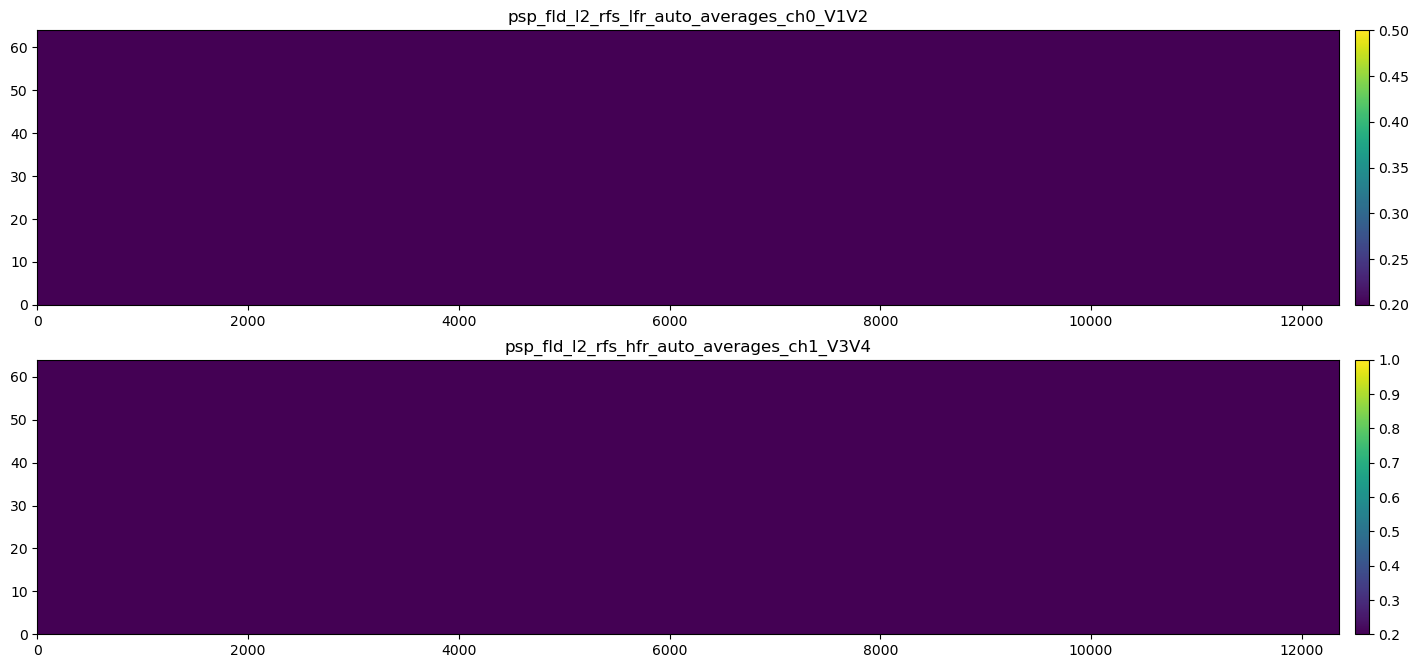

In [22]:
fig = plt.subplots(2, figsize=(20,8), dpi=100)
plt.subplot(2, 1, 1)
c1 = plt.pcolormesh(np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')).T, vmax=0.5, vmin=0.2)
plt.colorbar(c1, pad=0.01)
plt.title('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')
plt.subplot(2, 1, 2)
c2 = plt.pcolormesh(np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch1_V3V4')).T, vmax=1.0, vmin=0.2)
plt.colorbar(c2, pad=0.01)
plt.title('psp_fld_l2_rfs_hfr_auto_averages_ch1_V3V4')
plt.savefig('spectrum.png', format='png')
plt.show()

In [11]:
np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')).shape

(12358, 64)

In [153]:
cdf_dataset['epoch_lfr'].meta

<zAttrList:
CATDESC: Time for all LFR spectra [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: epoch_lfr [CDF_CHAR]
FILLVAL: 9999-12-31 23:59:59.999999 [CDF_TIME_TT2000]
FORMAT: I22 [CDF_CHAR]
LABLAXIS: epoch [CDF_CHAR]
MONOTON: INCREASE [CDF_CHAR]
SCALEMAX: 2019-04-02 00:00:00 [CDF_TIME_TT2000]
SCALEMIN: 2019-04-01 00:00:00 [CDF_TIME_TT2000]
TIME_BASE: J2000 [CDF_CHAR]
UNITS: ns [CDF_CHAR]
VALIDMAX: 2050-01-01 00:00:00 [CDF_TIME_TT2000]
VALIDMIN: 2010-01-01 00:00:00 [CDF_TIME_TT2000]
VAR_TYPE: support_data [CDF_CHAR]
>

In [174]:
np.array(cdf_dataset.get('epoch_lfr'))

array([datetime.datetime(2019, 4, 1, 0, 0, 4, 829288),
       datetime.datetime(2019, 4, 1, 0, 0, 11, 819767),
       datetime.datetime(2019, 4, 1, 0, 0, 18, 810245), ...,
       datetime.datetime(2019, 4, 1, 23, 59, 39, 757637),
       datetime.datetime(2019, 4, 1, 23, 59, 46, 748360),
       datetime.datetime(2019, 4, 1, 23, 59, 53, 738838)], dtype=object)

In [175]:
len(np.array(cdf_dataset.get('epoch_lfr')))

12358

In [247]:
tm.shape, freq.shape, Lp.T.shape

((12358,), (12358, 64), (64, 12358))

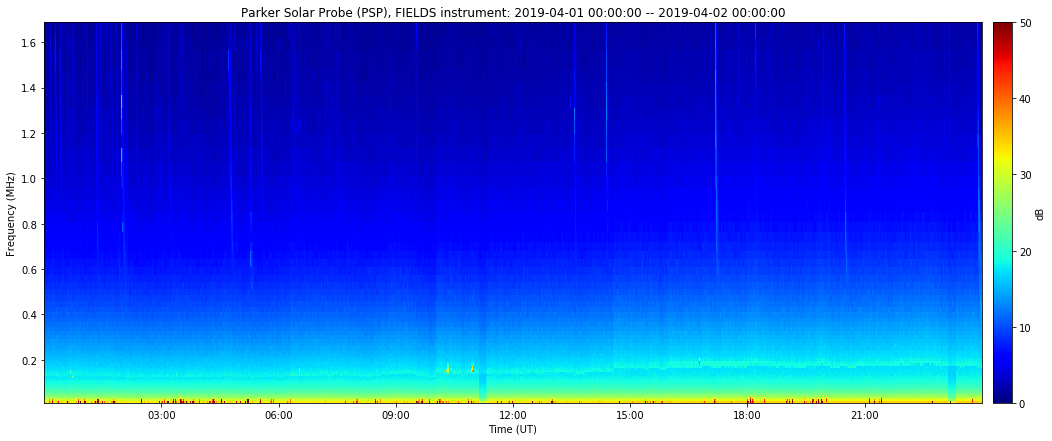

In [253]:
cdf_file = 'psp_fld_l2_rfs_lfr_20190401_v02.cdf'
cdf_dataset = pycdf.CDF(cdf_file)

tmin = cdf_dataset['epoch_lfr'].meta['SCALEMIN']
tmax = cdf_dataset['epoch_lfr'].meta['SCALEMAX']
tm = np.array(cdf_dataset.get('epoch_lfr_auto_averages_ch0_V1V2')) 

arr1 = np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'))
arr2 = np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch1_V3V4'))

arr_total = arr1 + arr2
# convert to dB 
Lp = 10 * np.log10(arr_total/10**-16)

#fmin = 10.5*10**3 # Hz 
#fmax = 1.7*10**6 # Hz 
## fcadence = np.log10(fmax/fmin)/64
#fstep = (fmax-fmin)/64.0
freq = np.array(cdf_dataset.get('frequency_lfr_auto_averages_ch0_V1V2'))

#f = []
#for n in range(64):
#    f.append(fmin + n*fstep)

# time axis 
tm = np.array(cdf_dataset.get('epoch_lfr'))

plt.figure(figsize=(20,7))
plt.pcolormesh(tm, freq[1]/10**6, Lp.T, vmin=0, vmax=50, cmap='jet')
plt.colorbar(label='dB', pad=0.01)
#locs, labels = plt.yticks()
#locs = np.array([int(loc) for loc in locs])[:-1]
#f = np.array(f)
# from Hz to MHz 
#plt.yticks(locs, [round(i/10**6, 2) for i in f[locs]])
#xlocs, xlabels = plt.xticks()
#plt.xticks(xlocs, tm)
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title('Parker Solar Probe (PSP), FIELDS instrument: {} -- {}'.format(tmin, tmax))
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

xmin = 0
xmax = 20
length = 10
step = xmax/length
y = np.arange(xmin, xmax, step)

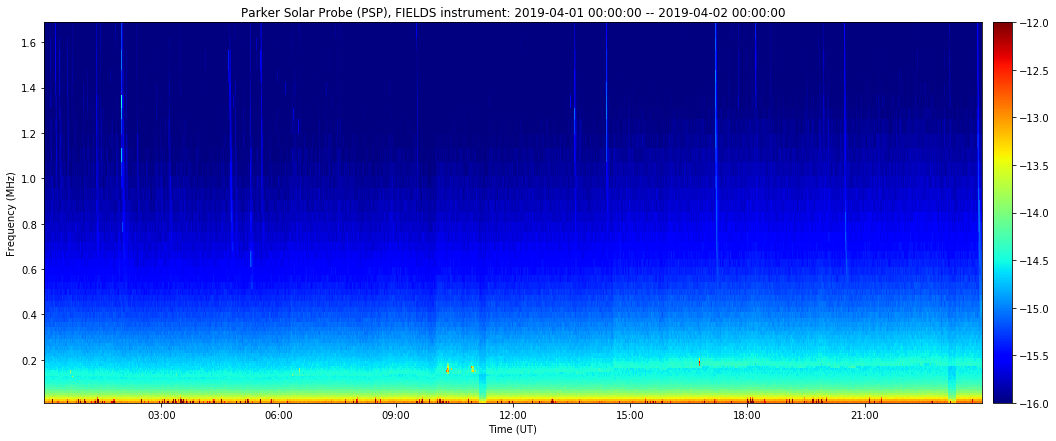

In [240]:
import os
os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
myFmt = DateFormatter('%H:%M')

# import the data file 
cdf_file = 'psp_fld_l2_rfs_lfr_20190401_v02.cdf'
cdf_dataset = pycdf.CDF(cdf_file)

# get the start and end dates of the observation 
tmin = cdf_dataset['epoch_lfr'].meta['SCALEMIN']
tmax = cdf_dataset['epoch_lfr'].meta['SCALEMAX']

# define the variables 
E = np.array(cdf_dataset.get('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2')) # Intensity
F = np.array(cdf_dataset.get('frequency_lfr_auto_averages_ch0_V1V2'))      # Frequency
T = np.array(cdf_dataset.get('epoch_lfr_auto_averages_ch0_V1V2'))          # Time
E_log = np.log10(E)

# plot the dynamic spectrum 
plt.figure(figsize=(20,7))
p = plt.pcolormesh(T, F[1]/10**6, E_log.T, vmin=-16, vmax=-12, cmap='jet') # pcolormesh is faster than pcolor
q = plt.colorbar(pad=0.01)
plt.xlabel('Time (UT)')
plt.ylabel('Frequency (MHz)')
plt.title('Parker Solar Probe (PSP), FIELDS instrument: {} -- {}'.format(tmin, tmax))
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()